In [16]:
# ANN regression of multivariate equation (sin)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [159]:
num_points = 1000
X = np.random.random((num_points,2))*10
y = (X[:,0])**2 * (X[:,1])**2

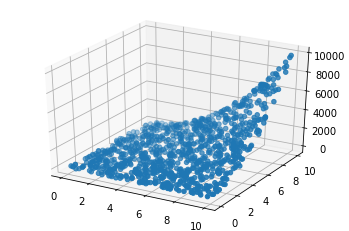

In [160]:
# Plot function

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0],X[:,1],y)

In [184]:
# Build model
def model_maker():

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(500, input_shape = (2,), activation = 'relu'),
        tf.keras.layers.Dense(500, activation = 'relu'),
        tf.keras.layers.Dense(1)
        ])
    optimizer = tf.keras.optimizers.Adam(0.01)
    model.compile(optimizer = optimizer, loss = 'mse')
    
    return model

In [185]:
regressor = model_maker()

In [186]:
regressor.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 500)               1500      
_________________________________________________________________
dense_41 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 501       
Total params: 252,501
Trainable params: 252,501
Non-trainable params: 0
_________________________________________________________________


In [187]:
regressor = model.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 714162.1250
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 714141.5625
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 713818.1250
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 712224.9375
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 711471.6250
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 711418.1250
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 710213.0000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 709580.7500
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 709202.4375
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 708118.6250
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 707901.8125
Epoch 12/100
32/32 [==============================] - 0s 1ms/st

32/32 [==============================] - 0s 1ms/step - loss: 671210.8125
Epoch 97/100
32/32 [==============================] - 0s 1ms/step - loss: 670780.6250
Epoch 98/100
32/32 [==============================] - 0s 1ms/step - loss: 669929.2500
Epoch 99/100
32/32 [==============================] - 0s 1ms/step - loss: 669798.8750
Epoch 100/100
32/32 [==============================] - 0s 1ms/step - loss: 669882.0625


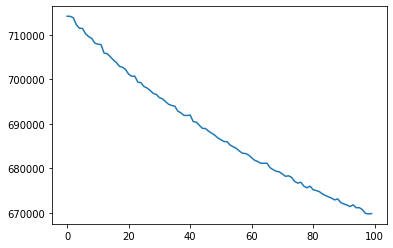

In [188]:
# Plot loss

plt.plot(regressor.history['loss'])

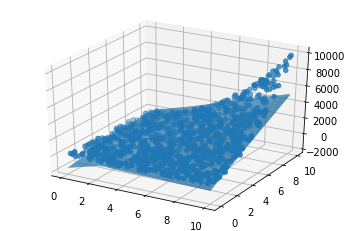

In [192]:
# Plot prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0],X[:,1],y)

# Surf plot

line = np.linspace(0,10,100)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
pred = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1], pred)
plt.show()